In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, make_blobs

import random

import warnings
warnings.filterwarnings("ignore")

# knn

## functions

In [0]:
# euclidean metrics
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

# calc weights
def weights(my_array):

    unq, cnts = np.unique(my_array, return_counts=True)

    return dict(zip(unq, cnts))

# knn algo
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        # dictionary with zero values for the unique values of classes
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])

    return answers

def accuracy(y_pred, y_true):
    return (sum(y_pred == y_true) / len(y_true))

# knn pred & plot
def get_graph(x_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # plot limits
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # predicting
    Z = knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # plot
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # train sample added
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

## data upload

In [0]:
x, y = load_iris(return_X_y=True)

x = x[:, :2]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1
)

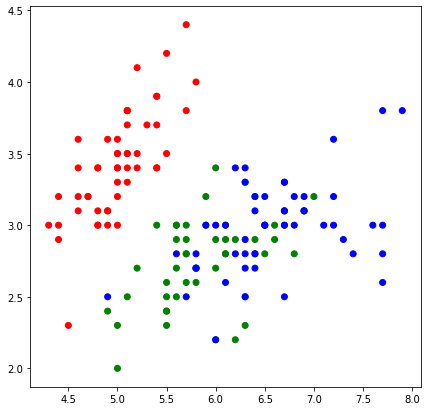

In [67]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap)

## build & fit

accuracy with k = 1: 0.667


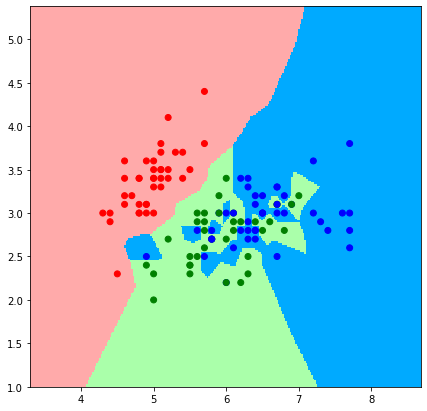

In [68]:
k = 1
y_pred = knn(x_train, y_train, x_test, 1)

print(f'accuracy with k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(x_train, y_train, k)

accuracy with k = 3: 0.667


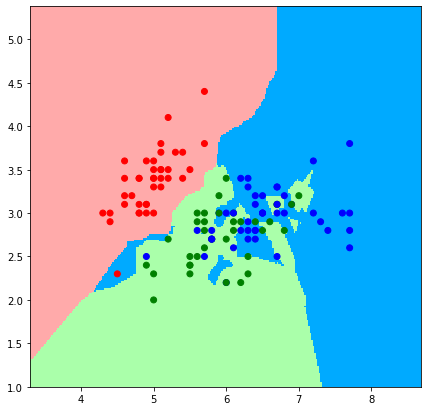

In [69]:
k = 3
y_pred = knn(x_train, y_train, x_test, 1)

print(f'accuracy with k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(x_train, y_train, k)

accuracy with k = 5: 0.667


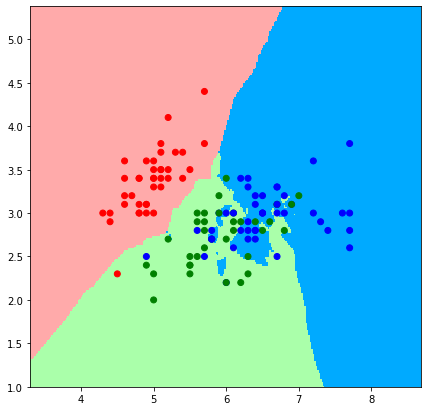

In [70]:
k = 5
y_pred = knn(x_train, y_train, x_test, 1)

print(f'accuracy with k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(x_train, y_train, k)

accuracy with k = 10: 0.667


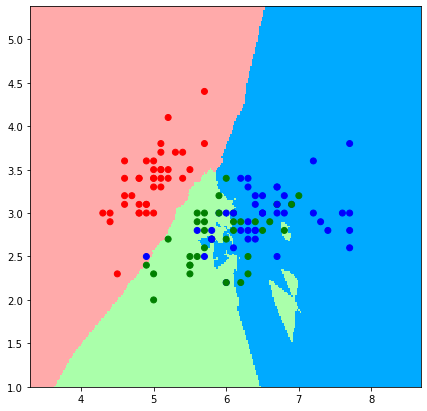

In [71]:
k = 10
y_pred = knn(x_train, y_train, x_test, 1)

print(f'accuracy with k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(x_train, y_train, k)

# kmeans

## functions

In [0]:
def kmeans(data, k, max_iterations, min_distance):
    
    classes = {i: [] for i in range(k)}
    centroids = [data[i] for i in range(k)]

    for i in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]

            classification = distances.index(min(distances))
            classes[classification].append(x)

        old_centroids = centroids.copy()

        # centroids as average by claster
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)

        # compare centroids swift to min
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(
                abs(
                    (centroids[centroid] - old_centroids[centroid]) / old_centroids * 100
                )
            ) > min_distance:
                optimal = False

        if optimal:
            break

    return old_centroids, classes

def visualize(centroids, classes):
    colors = ['r', 'g', 'b']

    plt.figure(figsize = (7,7))

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='brown')

    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])

    plt.show()

## data upload

In [0]:
x, y = make_blobs(n_samples=100, random_state=1)

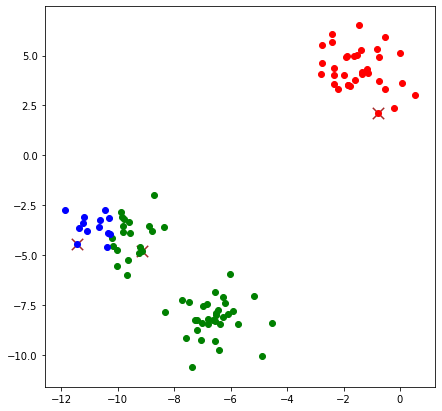

In [74]:
max_iterations = 1

min_distance = 1e-4

k = 3

centroids, clusters = kmeans(x, k, max_iterations, min_distance)

visualize(centroids, clusters)

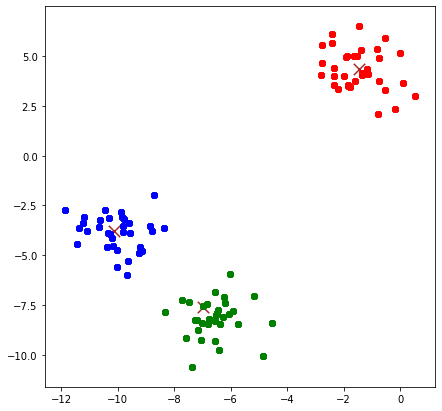

In [75]:
max_iterations = 5

centroids, clusters = kmeans(x, k, max_iterations, min_distance)

visualize(centroids, clusters)

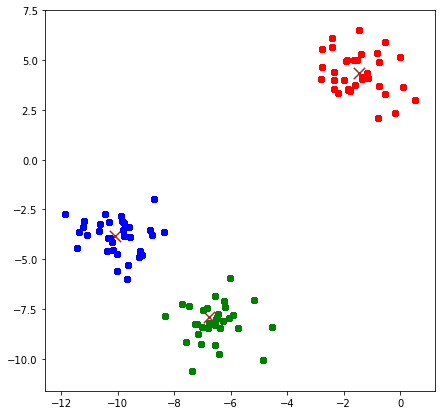

In [76]:
max_iterations = 10

centroids, clusters = kmeans(x, k, max_iterations, min_distance)

visualize(centroids, clusters)

#1
К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.

In [0]:
# calc weights
def weights(my_array):

    unq, cnts = np.unique(my_array, return_counts=True)

    return dict(zip(unq, cnts))

# knn algo
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            distance /= weights(y_train).get(y_train[i])
            test_distances.append((distance, y_train[i]))
        
        # dictionary with zero values for the unique values of classes
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])

    return answers

accuracy with k = 1: 0.667


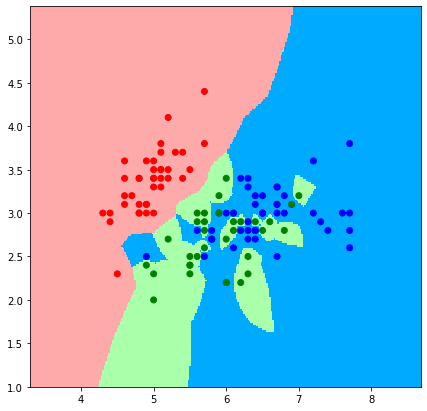

In [78]:
k = 1
y_pred = knn(x_train, y_train, x_test, 1)

print(f'accuracy with k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph(x_train, y_train, k)

#2

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

тут я ступил и понял это, когда уже написал функцию, - я написал описк внутрикласетрного расстояния для для kmeans, а не knn. но если сама идея корректна. то для кнн нужно просто дописать функцию поиска цетроидов.

для этого я пишу функцию
-- принимает датасет и найденные центроиды
-- проходится по каждому кластеру, считает евклидову дистанцию от каждой точки кластера до центроида, суммирует все расстрояния и делит на кол-во объектов в кластере
-- находит средн арифм значений по всем кластерам

In [0]:
def within_cluster_distance(x, y, centroids):
    # total within cluster value of the metrics
    total_dist = 0
    # iterate over each cluster
    for cl in set(y):
        # stacking the dataset to fix cluster x values
        temp = np.column_stack((x, y))
        # euclidean distance value
        cluster_dist = 0
        # for each point vs the cluster's centroid
        for point in temp[temp[:, -1] == cl]:
            cluster_dist += np.sqrt(
                (centroids[centroids in temp][0] - point[0])**2 + 
                (centroids[centroids in temp][1] - point[1])**2
            )
        # get average mean
        cluster_dist /= len(temp)
        print(f'cluster distance for cluster {cl}: {cluster_dist}')
        # add it to the total value
        total_dist += cluster_dist
    total_dist /= len(set(y))
    print(f'within cluster sum of square distance equal to:')

    return total_dist

# minor update to visualise 10 k-s
centroids, clusters = kmeans(x, k, max_iterations, min_distance)
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'aqua', 'purple', 'darkred']

    plt.figure(figsize = (12,12))

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='brown')

    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])

    plt.show()